In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence

data_path = "../data/"

[1-3] Infection.csv는 병원에서의 감염위험에 대한 데이터이다. 아래의 변수들을 사용하여 회귀분석을 시행하고자 한다. 


    Y = InfctRsk: infection risk in hospital
    X1 = Stay: average length of patient’s stay (in days)
    X2 = Xray: a measure of frequency of giving X-rays
    X3 = Region: indication in which of 4 U.S. regions the hospital is located: north-east(1), north-central(2), south(3), west(4).


In [11]:
data = pd.read_csv(data_path + "infection.csv", index_col=0)

1.	고려하고 있는 네 개의 변수 간의 산점도행렬을 확인하여라. 이상치가 발견되는가? Stay 변수를 기준으로 가장 큰 두 관측치를 제외하고 아래의 분석을 진행하기로 한다.

In [12]:
data.head()

,Stay,Age,InfctRsk,Culture,Xray,Beds,MedSchool,Region,Census,Nurses,Facilities
ID,,,,,,,,,,,
1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0


In [13]:
idx = [2,0,4,7]
data1 = data.iloc[:,idx];data1

,InfctRsk,Stay,Xray,Region
ID,,,,
1,4.1,7.13,39.6,4
2,1.6,8.82,51.7,2
3,2.7,8.34,74.0,3
4,5.6,8.95,122.8,4
5,5.7,11.20,88.9,1
...,...,...,...,...
109,5.7,11.80,116.9,2
110,5.8,9.50,70.9,3
111,4.4,7.70,67.9,4


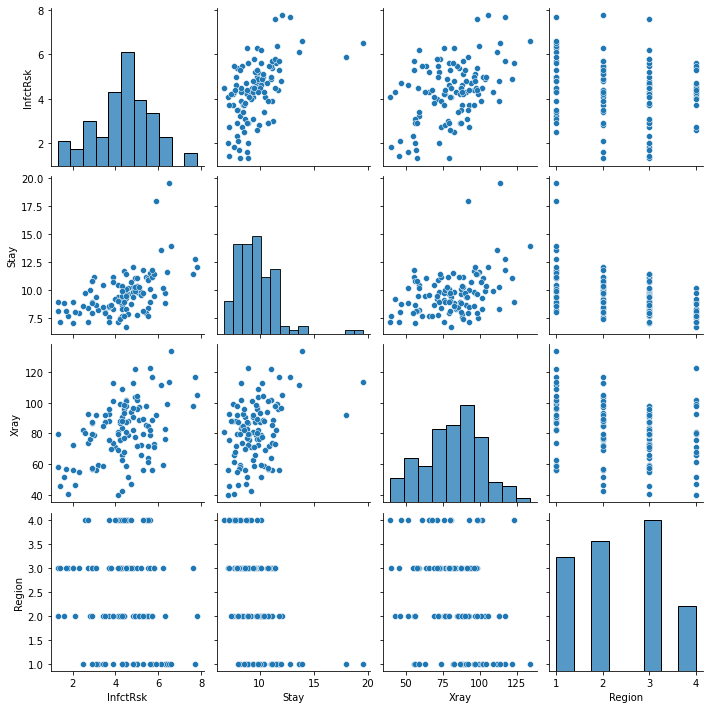

In [14]:
sns.pairplot(data, vars=['InfctRsk', 'Stay', 'Xray', 'Region'])
plt.show()

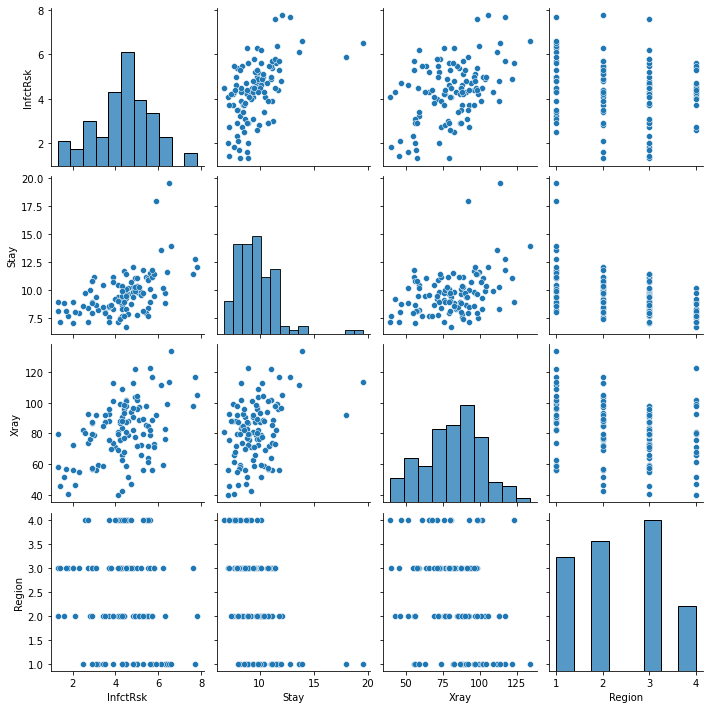

In [15]:
sns.pairplot(data1)
plt.show()

Stay가 15보다 큰 값을 제거

In [16]:
data2 = data1.loc[data.Stay<15,:].copy();data2

,InfctRsk,Stay,Xray,Region
ID,,,,
1,4.1,7.13,39.6,4
2,1.6,8.82,51.7,2
3,2.7,8.34,74.0,3
4,5.6,8.95,122.8,4
5,5.7,11.20,88.9,1
...,...,...,...,...
108,2.1,8.02,46.5,2
109,5.7,11.80,116.9,2
110,5.8,9.50,70.9,3


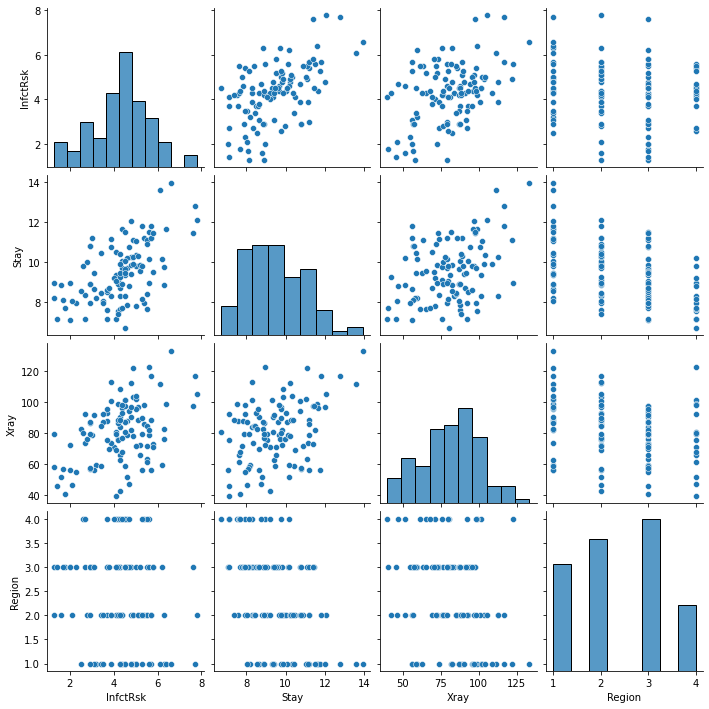

In [17]:
sns.pairplot(data2)
plt.show()

2.	Infection risk를 나머지 세 변수로 셜명하는 모형을 적합하여라. 각 회귀계수의 유의성을 테스트 하고 유의한 계수의 의미를 해석하시오. 

In [18]:
data2.columns

Index(['InfctRsk', 'Stay', 'Xray', 'Region'], dtype='object')

In [22]:
data2['Region_c'] = data2['Region'].astype('category')

In [23]:
data2['Region_c'] = data2.Region_c.cat.rename_categories(['north-east',
                                                          'north-centeral',
                                                          'south',
                                                          'west'])

In [25]:
model = smf.ols('InfctRsk~Stay+Xray+Region_c',data=data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     15.19
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           3.24e-11
Time:                        14:12:50   Log-Likelihood:                -158.35
No. Observations:                 111   AIC:                             328.7
Df Residuals:                     105   BIC:                             345.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.1343      0.877     -2.433      0.017      -3.874      -0.395
Region_c[T.north-centeral]     0.1713      0.281      0.609      0.544      -0.387       0.729
Region_c[T.south]              0.0955      0.289      0.330      0.742      -0.477       0.668
Region_c[T.west]               1.0578      0.378      2.798      0.006       0.308       1.807
Stay                           0.5054      0.081      6.205      0.000       0.344       0.667
Xray                           0.0176      0.006      3.113      0.002       0.006       0.029
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.134
Skew:                          -0.078   Prob(JB):                        0.935
Kurtosis:                       3.070   Cond. No.                         800.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. Region이 west인 지역을 reference level로 사용하여 모형을 다시 적합하고 유의한 회귀계수의 의미를 해석하시오. B의 결과와 어떻게 다른가? 

In [26]:
data2.columns

Index(['InfctRsk', 'Stay', 'Xray', 'Region', 'Region_c'], dtype='object')

In [31]:
model1 = smf.ols('InfctRsk~Stay+Xray+C(Region_c, Treatment(reference = "west"))', data2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     15.19
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           3.24e-11
Time:                        14:19:19   Log-Likelihood:                -158.35
No. Observations:                 111   AIC:                             328.7
Df Residuals:                     105   BIC:                             345.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                     -1.0764      0.721     -1.492      0.139      -2.507       0.354
C(Region_c, Treatment(reference="west"))[T.north-east]        -1.0578      0.378     -2.798      0.006      -1.807      -0.308
C(Region_c, Treatment(reference="west"))[T.north-centeral]    -0.8866      0.340     -2.608      0.010      -1.560      -0.213
C(Region_c, Treatment(reference="west"))[T.south]             -0.9624      0.323     -2.976      0.004      -1.604      -0.321
Stay                                                           0.5054      0.081      6.205      0.000       0.344       0.667
Xray                                                           0.0176      0.006      3.113      0.002       0.006       0.029
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.134
Skew:                          -0.078   Prob(JB):                        0.935
Kurtosis:                       3.070   Cond. No.                         624.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- west 대비 모든 변수 유의
- 모두 음수이므로, west의 감염위험이 높다.
- 더미 코딩만 다르게 -> 같은 모형, 계수의 추정치와 유의성이 달라짐 -> 더미코딩 된 것에 대한 계속 해석은 기준을 항상 생각

In [33]:
model3 = smf.ols('InfctRsk~Stay+Xray+C(Region)',data=data2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               InfctRsk   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     15.19
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           3.24e-11
Time:                        14:22:18   Log-Likelihood:                -158.35
No. Observations:                 111   AIC:                             328.7
Df Residuals:                     105   BIC:                             345.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.1343      0.877     -2.433      0.017      -3.874      -0.395
C(Region)[T.2]     0.1713      0.281      0.609      0.544      -0.387       0.729
C(Region)[T.3]     0.0955      0.289      0.330      0.742      -0.477       0.668
C(Region)[T.4]     1.0578      0.378      2.798      0.006       0.308       1.807
Stay               0.5054      0.081      6.205      0.000       0.344       0.667
Xray               0.0176      0.006      3.113      0.002       0.006       0.029
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.134
Skew:                          -0.078   Prob(JB):                        0.935
Kurtosis:                       3.070   Cond. No.                         800.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[4-6] 5개의 설명변수를 가진 자료가 있다. 종속변수는 졸업 후의 초봉(단위:1천달러)이다. 설명변수와 그 계수추정값은 아래와 같다.

|     변수           |     설명                     |     계수추정치    |
|--------------------|------------------------------|-------------------|
|     (intercept)    |                              |     50            |
|     X1             |     GPA                      |     20            |
|     X2             |     IQ                       |     0.07          |
|     X3             |     성별(여성=1, 남성=0)     |     35            |
|     X4             |     GPA와 IQ의 교호작용      |     0.01          |
|     X5             |     GPA와 성별의 교호작용    |     -10           |



- 졸업후의 초봉 = 50 + (20*GPA) + (0.07*IQ) + (35*여성) + (0.01*GPA*IQ) + (-10*GPA*여성)
- = 50 + (20*GPA) + (0.07*IQ) + (0.01*GPA*IQ) + (35-10*GPA)*Gender 
- GPA<3.5일 때, 여성이 수입이 많다
- GPA>3.5일 때, 남성이 수입이 더 많다. (즉, GPA값이 충분히 높다면


4. 아래 설명 중 어느것이 옳은 답이고, 그 이유는 무엇인가?
    1. 고정된 값의 IQ와 GPA에 대해, 남성이 여성보다 평균적으로 수입이 더 많다. 
    2. 고정된 값의 IQ와 GPA에 대해, 여성이 남성보다 평균적으로 수입이 더 많다.
    3. 고정된 값의 IQ와 GPA에 대해, GPA가 충분히 높다면 남성이 여성보다 평균적으로 수입이 더 많다. 
    4. 고정된 값의 IQ와 GPA에 대해, GPA가 충분히 높다면 여성이 남성보다 평균적으로 수입이 더 많다.

5. IQ가 110이고 GPA가 4.0인 여성의 급여를 예측하라. 

In [1]:
50 + 20*4 + 0.07*110 + 35 + 0.01*(4*110) - 10*(4*1)

137.1

6.	GPA/IQ 교호작용 항에 대한 계수가 아주 작으므로 교호작용 효과가 있다는 증거는 거의 없다. 참인가 거짓인가? 답에 대한 근거를 설명하여라.

- 변수들이 각각 표준화되어 있지 않기 때문에 계수의 절대적인 값을 비교하면 안된다. 거짓